In [2]:
print("Hello world")

Hello world


In [6]:
import pandas as pd
import os

HOUSING_DATA_PATH="/Users/erikbeerepoot/Code/ML/datasets/"
HOUSING_FILE_NAME="housing.csv"

def load_housing_data(path, filename):

    csv_path = os.path.join(path,filename)
    if not os.path.exists(csv_path):
        print("Could not locate data at: " + csv_path)
        return
    return pd.read_csv(csv_path)

housing = load_housing_data(HOUSING_DATA_PATH, HOUSING_FILE_NAME)

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


In [10]:
#import numpy as np
#housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
#housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
    

No handles with labels found to put in legend.


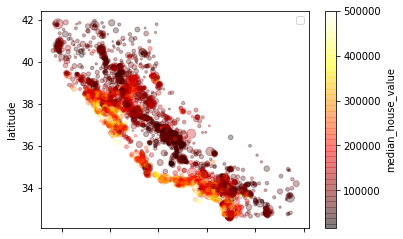

In [33]:
import matplotlib.pyplot as plt

housing_train_set = strat_train_set.copy()

housing_train_set.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.3,
    s=housing["population"]/100,
    c="median_house_value",
    cmap=plt.get_cmap("hot"),
    colorbar=True
)
plt.legend()

In [48]:
correlation_matrix = housing_train_set.corr()
correlation_matrix["median_house_value"].sort_values()

latitude             -0.142724
longitude            -0.047432
population           -0.026920
total_bedrooms        0.047689
households            0.064506
housing_median_age    0.114110
total_rooms           0.135097
income_cat            0.642274
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)